#**Airlines Problem**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
air=pd.DataFrame(pd.read_excel("Airlines+Data.xlsx"))
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
air.duplicated().sum()

0

<AxesSubplot:>

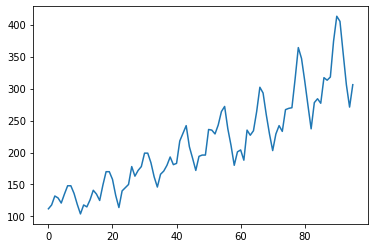

In [6]:
air.Passengers.plot()

In [7]:
air["month"]=air.Month.dt.strftime("%b") # month extraction
air["year"]=air.Month.dt.strftime("%Y") # year extraction

In [8]:
air.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


<AxesSubplot:xlabel='month', ylabel='year'>

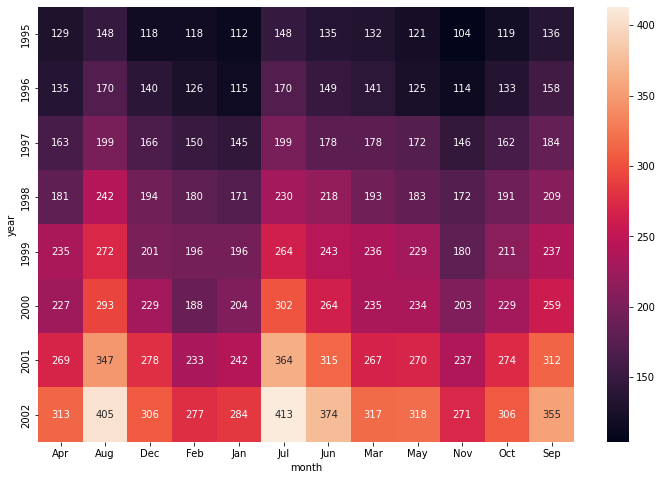

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

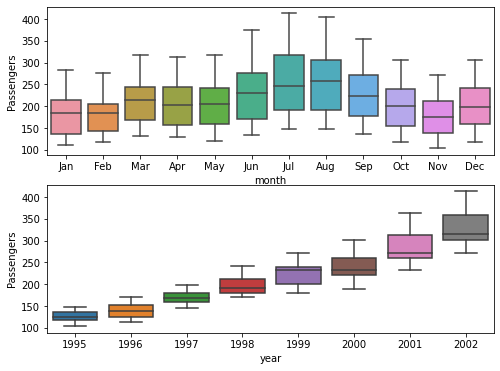

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

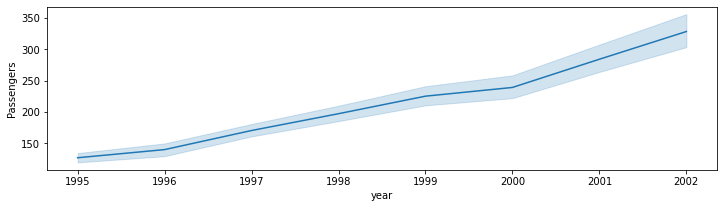

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air)

In [14]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           96 non-null     datetime64[ns]
 1   Passengers      96 non-null     int64         
 2   year            96 non-null     int64         
 3   log_passengers  96 non-null     float64       
 4   sq_year         96 non-null     int64         
 5   month_Apr       96 non-null     uint8         
 6   month_Aug       96 non-null     uint8         
 7   month_Dec       96 non-null     uint8         
 8   month_Feb       96 non-null     uint8         
 9   month_Jan       96 non-null     uint8         
 10  month_Jul       96 non-null     uint8         
 11  month_Jun       96 non-null     uint8         
 12  month_Mar       96 non-null     uint8         
 13  month_May       96 non-null     uint8         
 14  month_Nov       96 non-null     uint8         
 15  month_Oc

In [12]:
air['year']=pd.to_numeric(air['year'],errors='coerce')

In [13]:
air['log_passengers']=np.log(air['Passengers'])
air['sq_year']=air['year']*air['year']
air=pd.get_dummies(air,columns=['month'])

In [15]:
air.head()

,Month,Passengers,year,log_passengers,sq_year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,4.718499,3980025,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,4.770685,3980025,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,4.882802,3980025,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,4.859812,3980025,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,4.795791,3980025,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
air.columns

Index(['Month', 'Passengers', 'year', 'log_passengers', 'sq_year', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep'],
      dtype='object')

In [17]:
air.shape

(96, 17)

splitting data

In [18]:
Train = air.head(72)
Test = air.tail(24)

In [19]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~year',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.77877249281612

In [20]:
#Exponential

Exp = smf.ols('log_passengers~year',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['year'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.238311336481594

In [21]:
#Quadratic 

Quad = smf.ols('Passengers~year+sq_year',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["year","sq_year"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

52.53243090888692

In [22]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.2645156532034

In [23]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~year+sq_year+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['year','sq_year','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

37.66746430116578

In [24]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

132.18762800263448

In [25]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~year+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.71467024677926

In [26]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.714670
4,rmse_add_sea_quad,37.667464
1,rmse_Exp,43.238311
0,rmse_linear,51.778772
2,rmse_Quad,52.532431
3,rmse_add_sea,127.264516
5,rmse_Mult_sea,132.187628


In [ ]:
#Multiplicative Additive Seasonality is giving the least rmse value, therefore Multiplicative Additive Seasonality is the best model 

#**Coco Cola Problem**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


<AxesSubplot:>

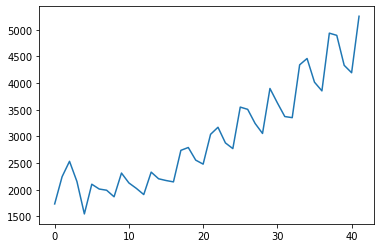

In [125]:
coco= pd.DataFrame(pd.read_excel("CocaCola_Sales_Rawdata.xlsx"))
coco.Sales.plot()

In [126]:
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [139]:
coco.duplicated().sum()

0

In [127]:
coco['Quarter'] = pd.date_range(start='1/01/1986', end='30/6/1996', freq='Q')

In [128]:
coco.head()

,Quarter,Sales
0,1986-03-31,1734.827000
1,1986-06-30,2244.960999
2,1986-09-30,2533.804993
3,1986-12-31,2154.962997
4,1987-03-31,1547.818996


In [129]:
coco["month"] = coco.Quarter.dt.strftime("%b") # month extraction
coco["year"] = coco.Quarter.dt.strftime("%Y") # year extraction

In [130]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     datetime64[ns]
 1   Sales    42 non-null     float64       
 2   month    42 non-null     object        
 3   year     42 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.4+ KB


In [131]:
#coco['month']=pd.to_numeric(coco['month'],errors='coerce')
coco['year']=pd.to_numeric(coco['year'],errors='coerce')

In [132]:
coco.head()

,Quarter,Sales,month,year
0,1986-03-31,1734.827000,Mar,1986
1,1986-06-30,2244.960999,Jun,1986
2,1986-09-30,2533.804993,Sep,1986
3,1986-12-31,2154.962997,Dec,1986
4,1987-03-31,1547.818996,Mar,1987


<AxesSubplot:xlabel='month', ylabel='year'>

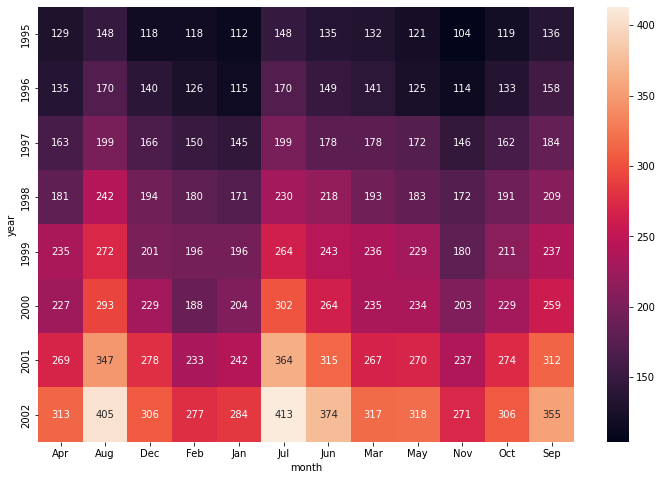

In [133]:
plt.figure(figsize=(12,8))
heatmap_y_quarter = pd.pivot_table(data=coco,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Sales'>

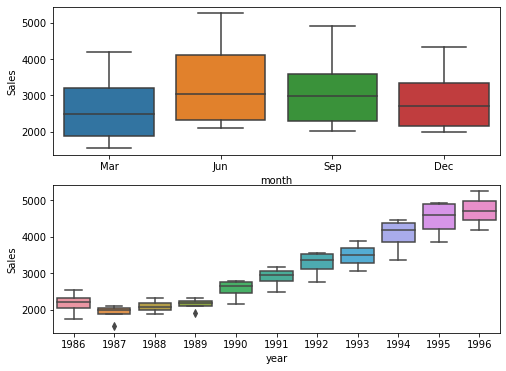

In [134]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=coco)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=coco)

<AxesSubplot:xlabel='year', ylabel='Sales'>

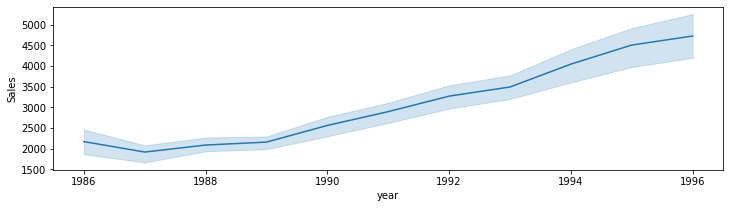

In [136]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=coco)

In [137]:
coco['log_sales']=np.log(coco['Sales'])
coco['sq_year']=coco['year']*coco['year']
coco=pd.get_dummies(coco,columns=['month'])

In [138]:
coco.head()

,Quarter,Sales,year,log_sales,sq_year,month_Dec,month_Jun,month_Mar,month_Sep
0,1986-03-31,1734.827000,1986,7.458663,3944196,0,0,1,0
1,1986-06-30,2244.960999,1986,7.716443,3944196,0,1,0,0
2,1986-09-30,2533.804993,1986,7.837477,3944196,0,0,0,1
3,1986-12-31,2154.962997,1986,7.675529,3944196,1,0,0,0
4,1987-03-31,1547.818996,1987,7.344602,3948169,0,0,1,0


In [140]:
coco.shape

(42, 9)

split data

In [141]:
Train = coco.head(30)
Test = coco.tail(12)

In [142]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~year',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

747.9354104998301

In [143]:
#Exponential

Exp = smf.ols('log_sales~year',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['year'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

610.3145829437541

In [144]:
#Quadratic 

Quad = smf.ols('Sales~year+sq_year',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["year","sq_year"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

606.6839705103461

In [146]:
#Additive seasonality 

add_sea = smf.ols('Sales~month_Dec+month_Jun+month_Mar+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Dec','month_Jun','month_Mar','month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941365

In [149]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~year+sq_year+month_Dec+month_Jun+month_Mar+month_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['year','sq_year','month_Dec','month_Jun','month_Mar','month_Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

562.5130584801102

In [150]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~month_Dec+month_Jun+month_Mar+month_Sep',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.923891213812

In [151]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~year+month_Dec+month_Jun+month_Mar+month_Sep',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

410.24970596017806

In [152]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
4,rmse_add_sea_quad,562.513058
2,rmse_Quad,606.683971
1,rmse_Exp,610.314583
0,rmse_linear,747.935410
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


In [ ]:
#Multiplicative Additive Seasonality is giving the least rmse value, therefore Multiplicative Additive Seasonality is the best model 